### Imports and Data Generation

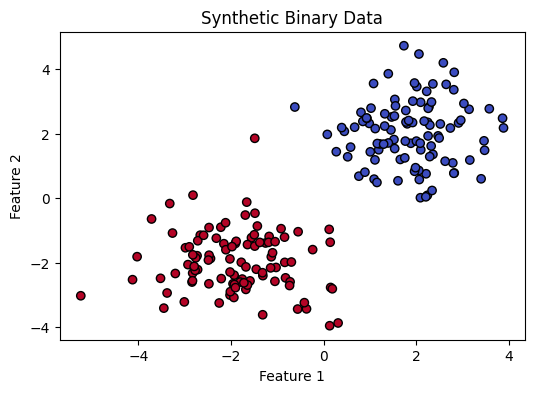

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

def generate_data(n_samples=200):
    """
    Generates two blobs of data for binary classification.
    """
    # Class 0: Centered at (2, 2)
    X0 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
    Y0 = np.zeros((n_samples // 2, 1))

    # Class 1: Centered at (-2, -2)
    X1 = np.random.randn(n_samples // 2, 2) + np.array([-2, -2])
    Y1 = np.ones((n_samples // 2, 1))

    X = np.vstack((X0, X1))
    Y = np.vstack((Y0, Y1))

    # Shuffle data
    indices = np.random.permutation(n_samples)
    return X[indices], Y[indices]

# Generate and visualize
X, Y = generate_data()

plt.figure(figsize=(6, 4))
plt.scatter(X[:,0], X[:,1], c=Y.flatten(), cmap='coolwarm', edgecolors='k')
plt.title("Synthetic Binary Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Activation Functions and Derivatives

In [2]:
class Activations:
    @staticmethod
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    @staticmethod
    def sigmoid_derivative(z):
        s = Activations.sigmoid(z)
        return s * (1 - s)

    @staticmethod
    def tanh(z):
        return np.tanh(z)

    @staticmethod
    def tanh_derivative(z):
        t = np.tanh(z)
        return 1 - t**2

    @staticmethod
    def relu(z):
        return np.maximum(0, z)

    @staticmethod
    def relu_derivative(z):
        return (z > 0).astype(float)

### The Single Neuron Class (Scratch Implementation)

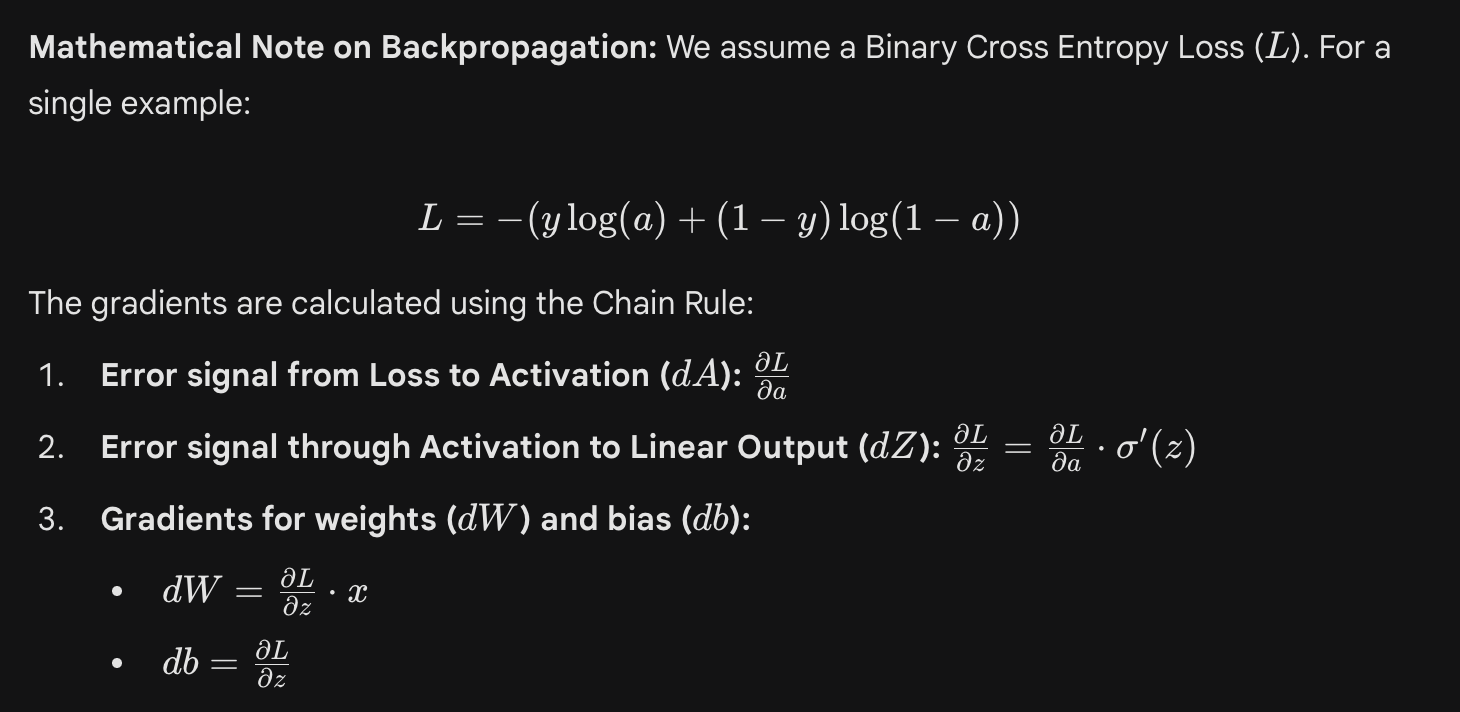

In [ ]:
class SingleNeuron:
    def __init__(self, input_dim, activation_name='sigmoid'):
        
        self.w = np.random.randn(input_dim, 1) * 0.01
        self.b = 0.0
        
        self.activation_name = activation_name
        if activation_name == 'sigmoid':
            self.act_func = Activations.sigmoid
            self.act_deriv = Activations.sigmoid_derivative
        elif activation_name == 'tanh':
            self.act_func = Activations.tanh
            self.act_deriv = Activations.tanh_derivative
        elif activation_name == 'relu':
            self.act_func = Activations.relu
            self.act_deriv = Activations.relu_derivative
        else:
            raise ValueError("Unsupported activation function")

    def forward(self, X):
        """
        Forward propagation: Z = Xw + b, A = activation(Z)
        """
        self.X_input = X 
        self.Z = np.dot(X, self.w) + self.b
        self.A = self.act_func(self.Z)
        return self.A

    def backward(self, Y, learning_rate):
        """
        Backward propagation to calculate gradients and update weights.
        """
        m = Y.shape[0]
        
        
        epsilon = 1e-15
        A_clipped = np.clip(self.A, epsilon, 1 - epsilon)
        
        # Derivative of Binary Cross Entropy Loss
        dA = - (np.divide(Y, A_clipped) - np.divide(1 - Y, 1 - A_clipped))
        
       
        dZ = dA * self.act_deriv(self.Z)
        
        dw = (1 / m) * np.dot(self.X_input.T, dZ)
        db = (1 / m) * np.sum(dZ)
        
        self.w -= learning_rate * dw
        self.b -= learning_rate * db
        
    def compute_loss(self, Y):
        m = Y.shape[0]
        epsilon = 1e-15
        A_clipped = np.clip(self.A, epsilon, 1 - epsilon)
        loss = - (1/m) * np.sum(Y * np.log(A_clipped) + (1 - Y) * np.log(1 - A_clipped))
        return loss

    def predict(self, X):
        A = self.forward(X)
        return (A > 0.5).astype(int)

### Training Loop and Comparison

In [ ]:
def train_model(X, Y, activation, epochs=1000, lr=0.1):
    neuron = SingleNeuron(input_dim=X.shape[1], activation_name=activation)
    loss_history = []
    
    for i in range(epochs):

        neuron.forward(X)
        
        loss = neuron.compute_loss(Y)
        loss_history.append(loss)
        
        neuron.backward(Y, learning_rate=lr)
        
        if i % 100 == 0:
            print(f"Epoch {i}, Loss ({activation}): {loss:.4f}")
            
    return neuron, loss_history

# Train three different neurons
print("--- Training Sigmoid ---")
neuron_sig, loss_sig = train_model(X, Y, 'sigmoid', epochs=500, lr=0.1)

print("\n--- Training Tanh ---")
# Tanh can be unstable with Log Loss if output is -1, 
# but our backprop handles the math generically.
neuron_tanh, loss_tanh = train_model(X, Y, 'tanh', epochs=500, lr=0.01)

print("\n--- Training ReLU ---")
# ReLU is risky for output layer (can explode), so we use a smaller LR
neuron_relu, loss_relu = train_model(X, Y, 'relu', epochs=500, lr=0.001)

--- Training Sigmoid ---
Epoch 0, Loss (sigmoid): 0.6822
Epoch 100, Loss (sigmoid): 0.0321
Epoch 200, Loss (sigmoid): 0.0208
Epoch 300, Loss (sigmoid): 0.0163
Epoch 400, Loss (sigmoid): 0.0138

--- Training Tanh ---
Epoch 0, Loss (tanh): 1.9653
Epoch 100, Loss (tanh): 21.5871
Epoch 200, Loss (tanh): 21.5871
Epoch 300, Loss (tanh): 21.5871
Epoch 400, Loss (tanh): 21.5871

--- Training ReLU ---
Epoch 0, Loss (relu): 2.5884
Epoch 100, Loss (relu): 0.0763
Epoch 200, Loss (relu): 0.0240
Epoch 300, Loss (relu): 0.0135
Epoch 400, Loss (relu): 0.0104


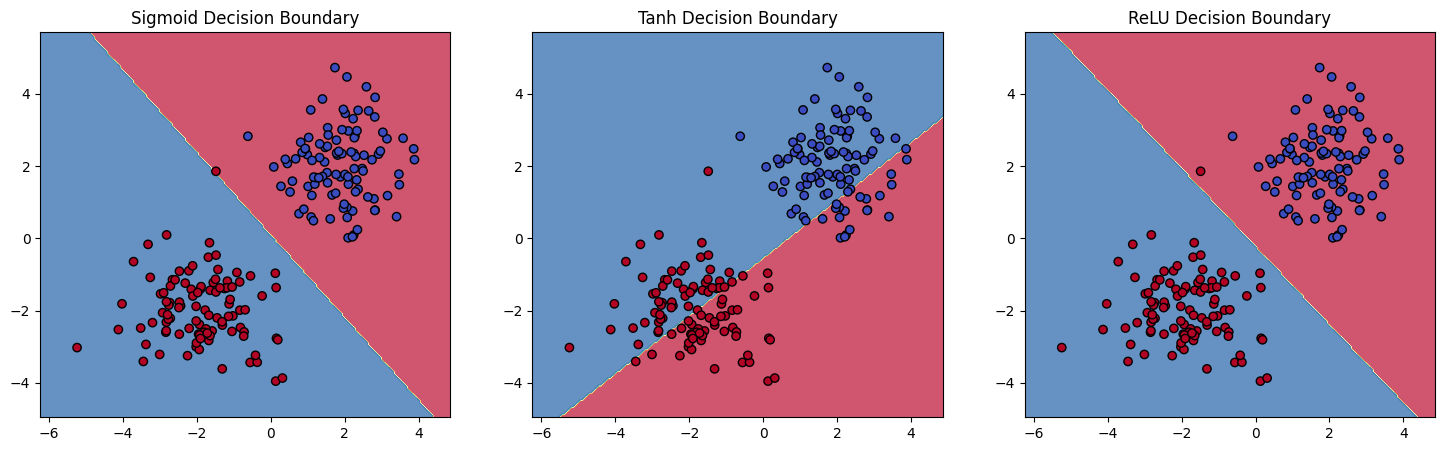

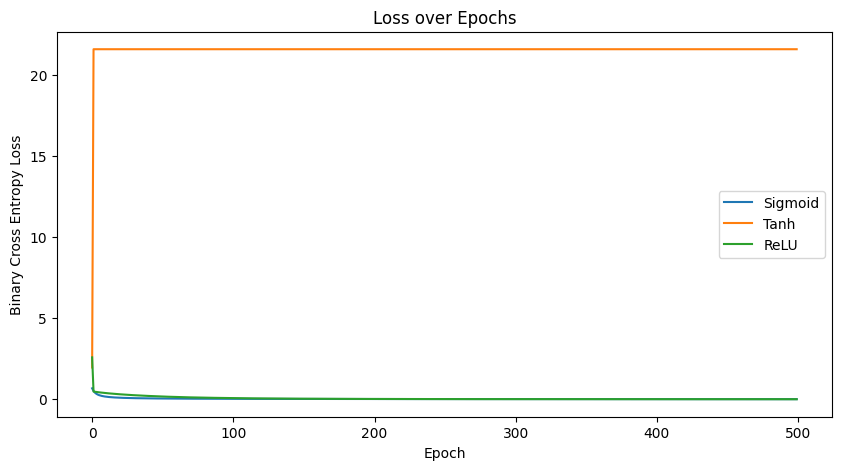

In [ ]:
def plot_decision_boundary(model, X, Y, ax, title):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.05  # step size in the mesh
    
    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    ax.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    ax.scatter(X[:, 0], X[:, 1], c=Y.flatten(), cmap=plt.cm.coolwarm, edgecolors='k')
    ax.set_title(title)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_decision_boundary(neuron_sig, X, Y, axes[0], "Sigmoid Decision Boundary")
plot_decision_boundary(neuron_tanh, X, Y, axes[1], "Tanh Decision Boundary")
plot_decision_boundary(neuron_relu, X, Y, axes[2], "ReLU Decision Boundary")

plt.show()

# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(loss_sig, label='Sigmoid')
plt.plot(loss_tanh, label='Tanh')
plt.plot(loss_relu, label='ReLU')
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross Entropy Loss")
plt.legend()
plt.show()